In [12]:
import os
import sklearn
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

tf.random.set_seed(42)

data = '211027_70ms_3ea_Data_2kPa'
dataname = data+'_1'
filename = 'D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v3/myData/'+data+'.csv'
SD = pd.read_csv(filename)
SD=SD.iloc[:,:28]

In [13]:
SDext =SD # SensorData[SensorData['z']==0]
mask = SDext["z"].isin([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
SD = SDext[mask]

In [14]:
import numpy as np
toRad = np.pi/180 
SD['cos']=np.cos(SD.theta_enc*toRad)
SD['sin']=np.sin(SD.theta_enc*toRad)
SD['r'] = (SD['r']-SD['r'].mean())/(SD['r'].max()-SD['r'].min())*2
SD['theta_enc'] = (SD['theta_enc']-SD['theta_enc'].mean())/(SD['theta_enc'].max()-SD['theta_enc'].min())*2
SD['z'] = (SD['z']-SD['z'].mean())/(SD['z'].max()-SD['z'].min())*2

In [30]:
X = SD.iloc[:,:24]
y = SD.iloc[:,[27,28,29]]

In [31]:
y

,z,cos,sin
0,-0.999917,1.000000,0.000000
1,-0.999917,1.000000,0.000000
2,-0.999917,1.000000,0.000000
3,-0.999917,1.000000,0.000000
4,-0.999917,1.000000,0.000000
...,...,...,...
69119,1.000083,0.993211,-0.116324
69120,1.000083,0.993211,-0.116324
69121,1.000083,0.993211,-0.116324
69122,1.000083,0.993211,-0.116324


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.001, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.2, random_state=42)

In [33]:
X_sum = len(X_train)+len(X_valid)+len(X_test)
X_train_per = int(len(X_train)/X_sum*100)
X_valid_per = int(len(X_valid)/X_sum*100)
X_test_per = int(len(X_test)/X_sum*100)

print('X_train: ',len(X_train),'ea',X_train_per,'%   ', 
      'X_valid: ',len(X_valid),'ea',X_valid_per,'%   ',
      'X_test: ',len(X_test),'ea',X_test_per,'%',)

X_train:  55243 ea 79 %    X_valid:  13811 ea 19 %    X_test:  70 ea 0 %


In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [35]:
import pickle
from joblib import dump, load

file_name = 'myScaler/'+dataname+'_SS.pkl'
dump(scaler, file_name)

['myScaler/211027_70ms_3ea_Data_2kPa_1_SS.pkl']

In [36]:
model = tf.keras.models.load_model('myModel/'+dataname+'.h5')
scaler = load(file_name)
valid_predictions = model.predict(X_valid)

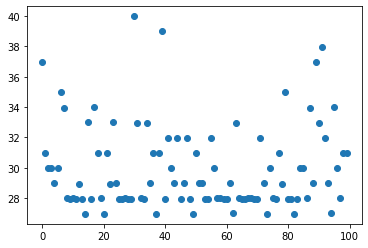

In [48]:
import time
a = np.zeros(100)
for i in range(0,100):
    Prev_time = time.time()
    test_predictions = model.predict(X_test)
    cal_time = round((time.time()-Prev_time)*1000,2)
    a[i] = cal_time
b= range(0,100)
plt.scatter(b,a)

In [38]:
valid_predictions_df=pd.DataFrame(valid_predictions)
valid_predictions_df.columns = ["valid_z","valid_cos","valid_sin"]
#valid_predictions_df.columns = ["valid_r","valid_theta","valid_z"]
#valid_predictions_df.columns = ["valid_cos","valid_sin"]
#valid_predictions_df.columns = ["valid_z"]
#valid_predictions_df.columns = ["valid_theta"]


valid_predictions_df

,valid_z,valid_cos,valid_sin
0,0.444848,-0.211655,0.732755
1,0.459638,-0.937481,-0.445313
2,0.192243,0.902067,-0.406652
3,-0.108422,0.780153,-0.739549
4,0.409220,-0.878284,0.425604
...,...,...,...
13806,-0.576871,0.956595,0.360606
13807,-0.415338,0.409459,0.935626
13808,-0.486547,0.010950,1.000949
13809,0.209138,0.294899,0.962850


In [39]:
k= y_valid.to_numpy()
k_df = pd.DataFrame(k)
k_df.columns  = ["z","cos","sin"]
#k_df.columns = ["r","theta_enc","z"]
#k_df.columns  = ["cos","sin"]
#k_df.columns  = ["z"]
#k_df.columns  = ["theta_enc"]
k_df

,z,cos,sin
0,-0.285632,-0.724292,0.689493
1,0.285797,-0.952129,-0.305695
2,0.000083,0.861629,-0.507538
3,0.142940,0.811370,-0.584533
4,0.285797,-0.930737,0.365689
...,...,...,...
13806,-0.714203,0.931881,0.362763
13807,-0.285632,0.416439,0.909163
13808,-0.571346,0.055124,0.998479
13809,0.571511,0.042922,0.999078


In [40]:
ValidPre = pd.concat( [k_df,valid_predictions_df],axis=1)
ValidPre.head(5)
corr = ValidPre.corr()
print("corr")
for i in range(0,3):    
    print(format(corr[valid_predictions_df.columns[i]][k_df.columns[i]]*100,'.2f')+'%',k_df.columns[i])
corr

corr
89.64% z
86.62% cos
86.53% sin


,z,cos,sin,valid_z,valid_cos,valid_sin
z,1.000000,-0.009071,0.006686,0.896375,-0.054039,0.032116
cos,-0.009071,1.000000,0.007548,-0.056225,0.866155,0.056420
sin,0.006686,0.007548,1.000000,0.043696,0.048783,0.865341
valid_z,0.896375,-0.056225,0.043696,1.000000,-0.061186,0.040726
valid_cos,-0.054039,0.866155,0.048783,-0.061186,1.000000,0.061315
valid_sin,0.032116,0.056420,0.865341,0.040726,0.061315,1.000000


<AxesSubplot:xlabel='sin', ylabel='valid_sin'>

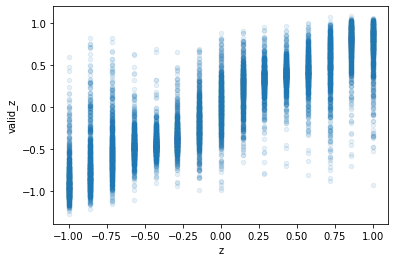

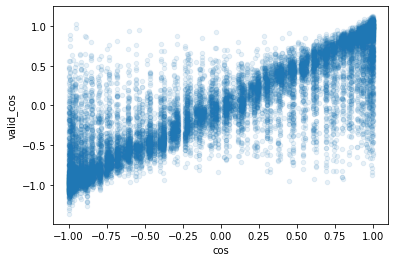

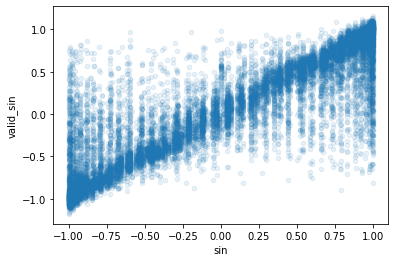

In [41]:
#ValidPre.plot(kind="scatter", x= "r",y= "valid_r",alpha = 0.1)
#ValidPre.plot(kind="scatter", x= "theta_enc",y= "valid_theta",alpha = 0.1)
ValidPre.plot(kind="scatter", x= "z",y= "valid_z",alpha = 0.1)
ValidPre.plot(kind="scatter", x= "cos",y= "valid_cos",alpha = 0.1)
ValidPre.plot(kind="scatter", x= "sin",y= "valid_sin",alpha = 0.1)
#plt.savefig('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v3/savefig/210903_70ms_3ea_sin.png')